The below code will sum up each column 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)
column_sums = df.sum()
print(column_sums)

Gas Warm Air Furnaces                                   15680634
Oil Warm Air Furnaces                                     152181
Residential Gas Automatic Storage Water Heaters         19557521
Residential Electric Automatic Storage Water Heaters    19972172
Commercial Gas Storage Water Heaters                      373414
Commercial Electric Storage Water Heaters                 615970
Unitary_Air_Conditioning                                25191702
Unitary_Heat_Pump                                       16042753
Unitary_AC_HP_sub16.5                                    1672354
Unitary_AC_HP_16.5-21.9                                  3975548
Unitary_AC_HP_22.0-26.9                                  8118673
Unitary_AC_HP_27.0-32.9                                  6434067
Unitary_AC_HP_33.0-38.9                                  8675715
Unitary_AC_HP_39.0-43.9                                  3084644
Unitary_AC_HP_44.0-53.9                                  4523357
Unitary_AC_HP_54.0-64.9  

C:\Users\bober\AppData\Local\Temp\ipykernel_11132\4015132398.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()


The below code will format the csv file into a python-compatible date time, and generates a plot that will display the actual values for each category with a moving average of window size 3

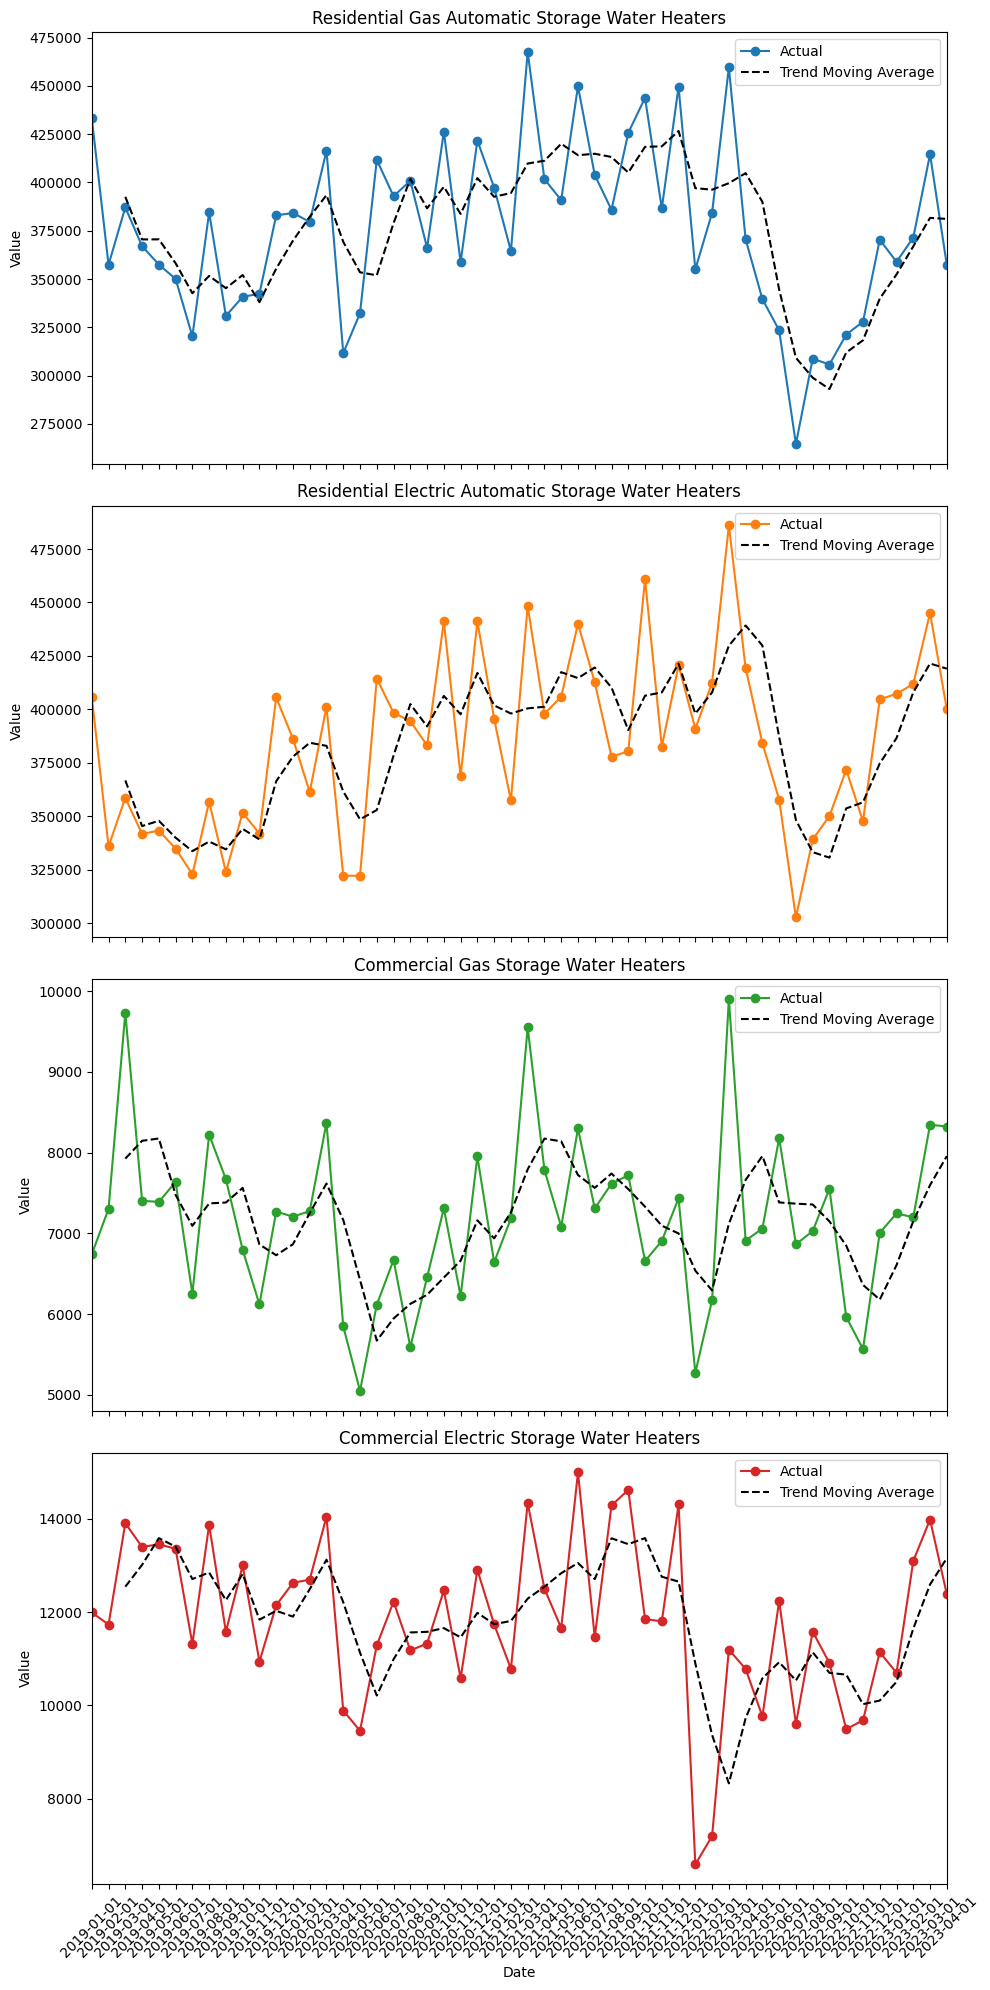

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'])

#  format 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
window_size = 3

# Calculate the moving average for each column
df_ma = df.rolling(window=window_size).mean()
# Create subplots for each category
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Plotting each category with its moving average in the same subplot
categories = ['Residential Gas Automatic Storage Water Heaters', 'Residential Electric Automatic Storage Water Heaters', 'Commercial Gas Storage Water Heaters', 'Commercial Electric Storage Water Heaters']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, category in enumerate(categories):
    # Plot actual values
    df[category].plot(ax=axes[i], color=colors[i], marker='o', linestyle='-', label='Actual')
    # Plot moving average
    df_ma[category].plot(ax=axes[i], color='black', linestyle='--', label='Trend Moving Average')

    axes[i].set_title(category)
    axes[i].set_ylabel('Value')
    axes[i].legend()

# Set common x-label
axes[-1].set_xlabel('Date')

# Rotate and format the date labels
plt.setp(axes, xticks=df.index, xticklabels=df.index.strftime('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

# Display the plots
plt.show()

Below will generate a stacked barchart by each year and by residental and commercial

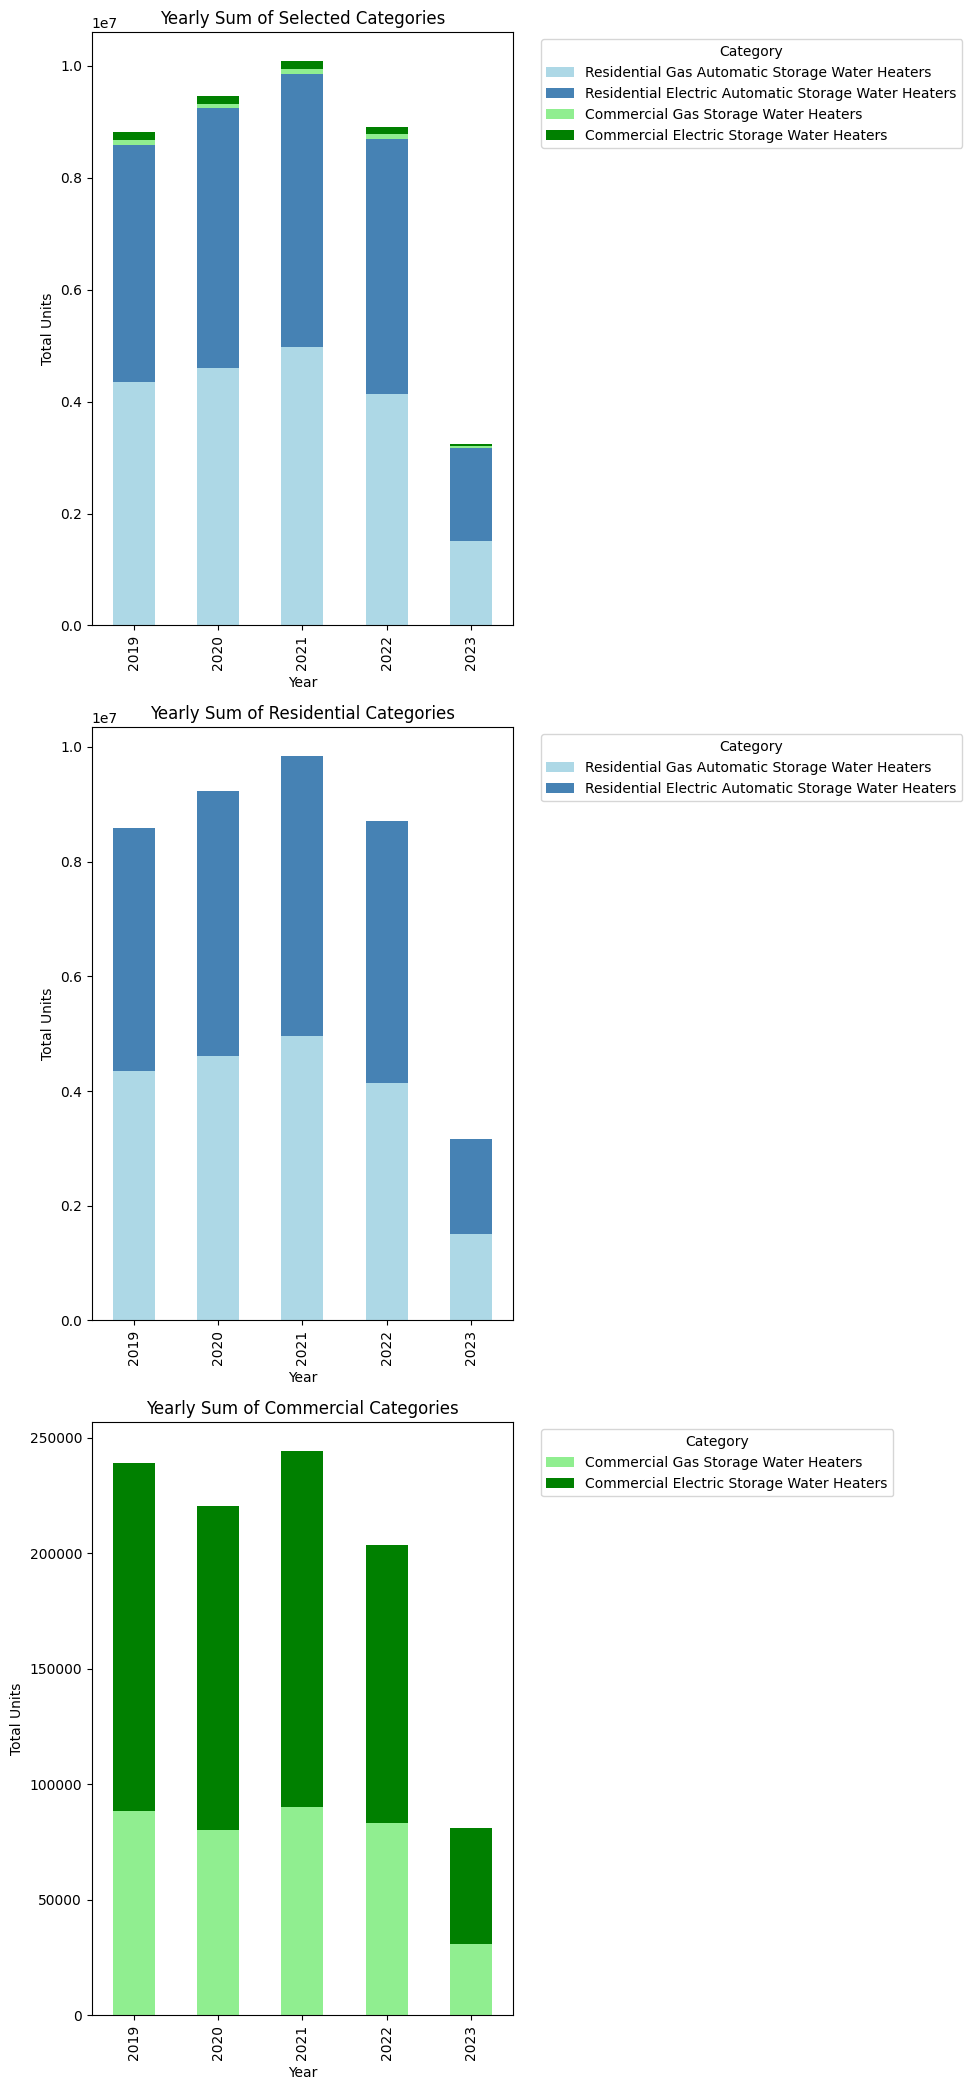

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                  'Residential Electric Automatic Storage Water Heaters', 
                                  'Commercial Gas Storage Water Heaters', 
                                  'Commercial Electric Storage Water Heaters']].sum()

residential_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                       'Residential Electric Automatic Storage Water Heaters']].sum()

commercial_data = df.groupby('Year')[['Commercial Gas Storage Water Heaters', 
                                      'Commercial Electric Storage Water Heaters']].sum()

# Define a color map for the categories
color_map = {
    'Residential Gas Automatic Storage Water Heaters': 'lightblue',
    'Residential Electric Automatic Storage Water Heaters': 'steelblue',
    'Commercial Gas Storage Water Heaters': 'lightgreen',
    'Commercial Electric Storage Water Heaters': 'green'
}

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 21))

# Combined Plot with specified colors
summed_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in summed_data.columns], ax=ax[0])
ax[0].set_title('Yearly Sum of Selected Categories')
ax[0].set_ylabel('Total Units')
ax[0].set_xlabel('Year')
ax[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Residential Plot with specified colors
residential_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in residential_data.columns], ax=ax[1])
ax[1].set_title('Yearly Sum of Residential Categories')
ax[1].set_ylabel('Total Units')
ax[1].set_xlabel('Year')
ax[1].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Commercial Plot with specified colors
commercial_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in commercial_data.columns], ax=ax[2])
ax[2].set_title('Yearly Sum of Commercial Categories')
ax[2].set_ylabel('Total Units')
ax[2].set_xlabel('Year')
ax[2].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

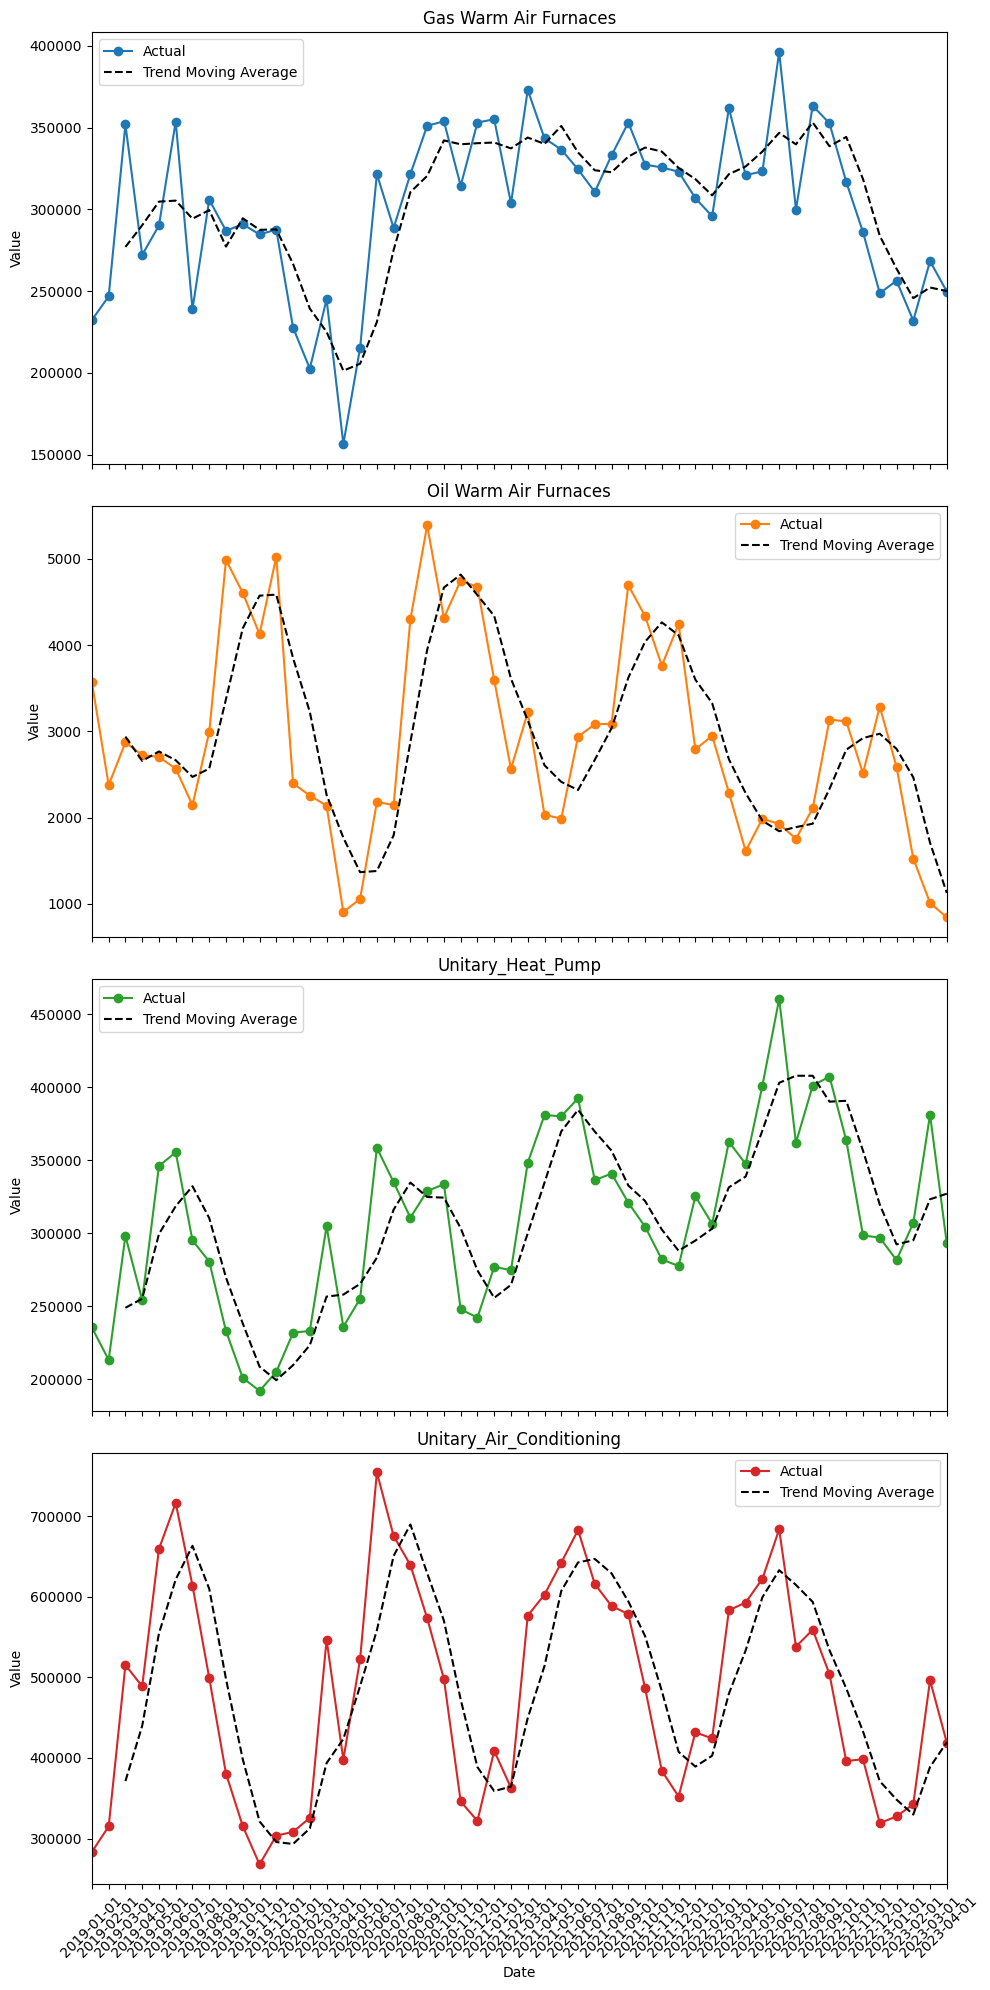

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'])

#  format 'YYYY-MM-DD'
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
window_size = 3

# Calculate  moving average for each column
df_ma = df.rolling(window=window_size).mean()
# Create subplots for each category
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Plotting each category with its moving average in the same subplot
categories = ['Gas Warm Air Furnaces', 'Oil Warm Air Furnaces', 'Unitary_Heat_Pump', 'Unitary_Air_Conditioning']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for i, category in enumerate(categories):
    # Plot actual values
    df[category].plot(ax=axes[i], color=colors[i], marker='o', linestyle='-', label='Actual')
    # Plot moving average
    df_ma[category].plot(ax=axes[i], color='black', linestyle='--', label='Trend Moving Average')

    axes[i].set_title(category)
    axes[i].set_ylabel('Value')
    axes[i].legend()

# Set common x-label
axes[-1].set_xlabel('Date')

# Rotate and format the date labels
plt.setp(axes, xticks=df.index, xticklabels=df.index.strftime('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adjust layout to fit everything
plt.tight_layout()

plt.show()

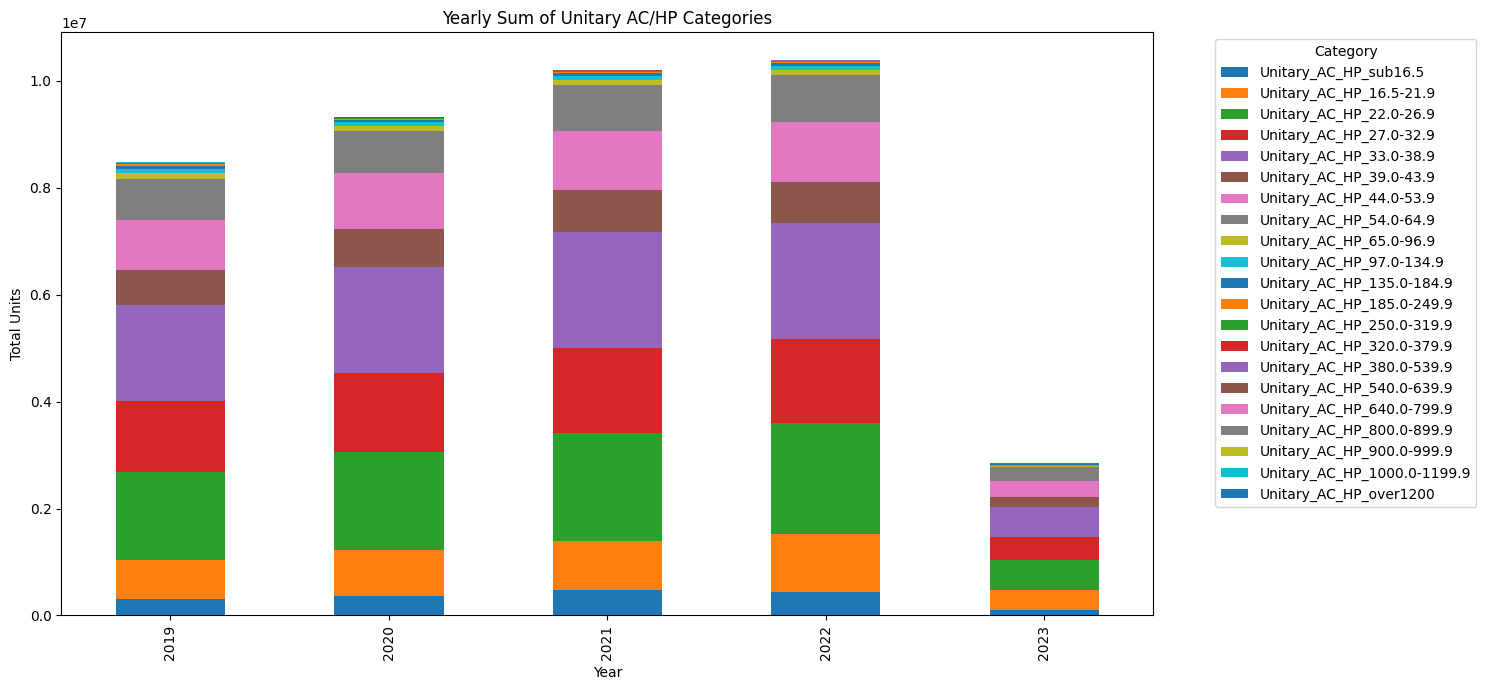

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filepath' is the path to your CSV file
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# List of Unitary AC/HP categories
unitary_categories = [
    'Unitary_AC_HP_sub16.5', 'Unitary_AC_HP_16.5-21.9', 'Unitary_AC_HP_22.0-26.9',
    'Unitary_AC_HP_27.0-32.9', 'Unitary_AC_HP_33.0-38.9', 'Unitary_AC_HP_39.0-43.9',
    'Unitary_AC_HP_44.0-53.9', 'Unitary_AC_HP_54.0-64.9', 'Unitary_AC_HP_65.0-96.9',
    'Unitary_AC_HP_97.0-134.9', 'Unitary_AC_HP_135.0-184.9', 'Unitary_AC_HP_185.0-249.9',
    'Unitary_AC_HP_250.0-319.9', 'Unitary_AC_HP_320.0-379.9', 'Unitary_AC_HP_380.0-539.9',
    'Unitary_AC_HP_540.0-639.9', 'Unitary_AC_HP_640.0-799.9', 'Unitary_AC_HP_800.0-899.9',
    'Unitary_AC_HP_900.0-999.9', 'Unitary_AC_HP_1000.0-1199.9', 'Unitary_AC_HP_over1200'
]

# Sum up the values for each year for the specified categories
summed_unitary_data = df.groupby('Year')[unitary_categories].sum()

# Plotting
summed_unitary_data.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Yearly Sum of Unitary AC/HP Categories')
plt.ylabel('Total Units')
plt.xlabel('Year')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

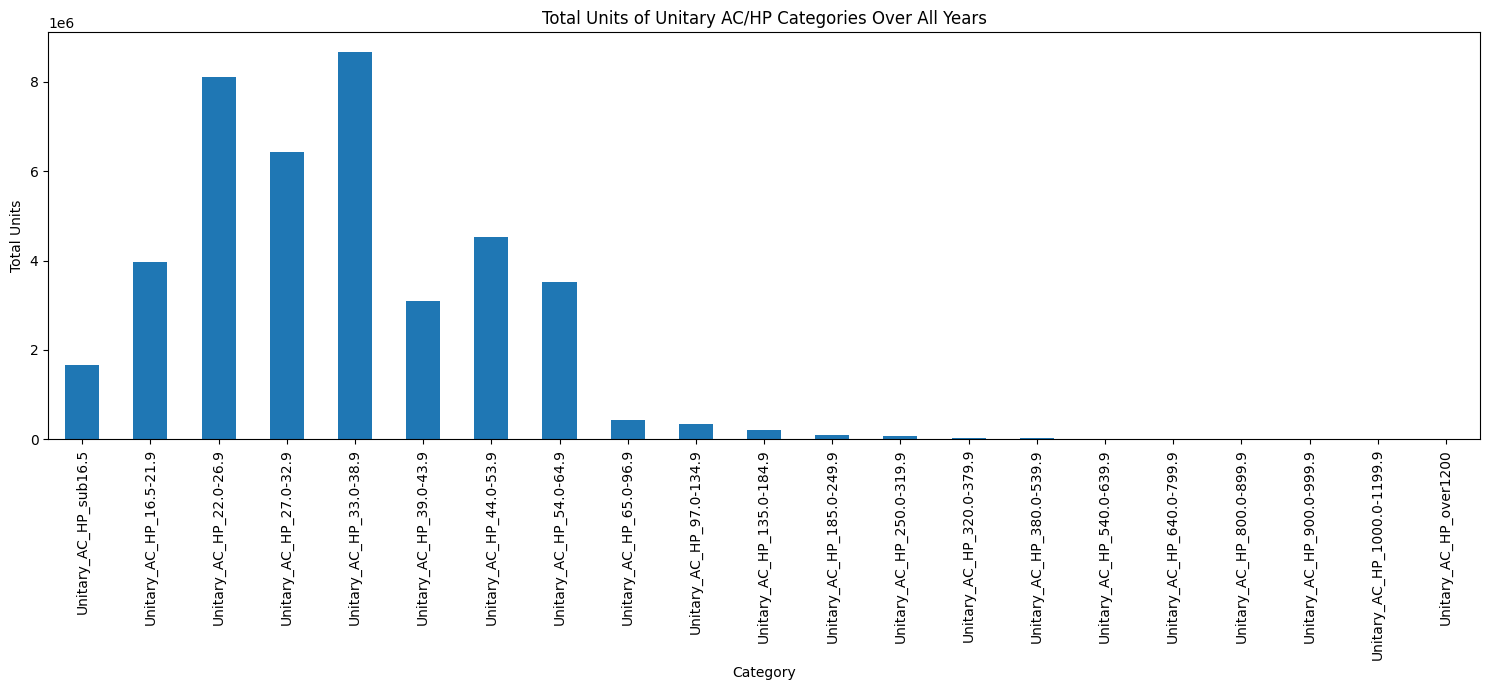

In [20]:
# Load the dataset
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# List of Unitary AC/HP categories 
unitary_categories = [
    'Unitary_AC_HP_sub16.5', 'Unitary_AC_HP_16.5-21.9', 'Unitary_AC_HP_22.0-26.9',
    'Unitary_AC_HP_27.0-32.9', 'Unitary_AC_HP_33.0-38.9', 'Unitary_AC_HP_39.0-43.9',
    'Unitary_AC_HP_44.0-53.9', 'Unitary_AC_HP_54.0-64.9', 'Unitary_AC_HP_65.0-96.9',
    'Unitary_AC_HP_97.0-134.9', 'Unitary_AC_HP_135.0-184.9', 'Unitary_AC_HP_185.0-249.9',
    'Unitary_AC_HP_250.0-319.9', 'Unitary_AC_HP_320.0-379.9', 'Unitary_AC_HP_380.0-539.9',
    'Unitary_AC_HP_540.0-639.9', 'Unitary_AC_HP_640.0-799.9', 'Unitary_AC_HP_800.0-899.9',
    'Unitary_AC_HP_900.0-999.9', 'Unitary_AC_HP_1000.0-1199.9', 'Unitary_AC_HP_over1200'
]

# Check if all categories are present in the dataset columns
available_categories = [cat for cat in unitary_categories if cat in df.columns]

# Sum the values for each category across all years
summed_categories = df[available_categories].sum()

# Plotting
summed_categories.plot(kind='bar', figsize=(15, 7))
plt.title('Total Units of Unitary AC/HP Categories Over All Years')
plt.ylabel('Total Units')
plt.xlabel('Category')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()
